Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

## Dados unidimensionais

Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt".

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50.

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/Mestrado/Discipinas/Exercícios - Ciência de Dados/Ex2/data/"

In [ ]:
salas = []
salas.append(np.loadtxt(PATH + "notas_sala01.txt"))
salas.append(np.loadtxt(PATH + "notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


**Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2.**

### Questão 01.
Demonstre o porquê dessa conclusão estar equivocada.
   - Sugestão: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

In [ ]:
notas_dict = {
    "sala1": salas[0],
    "sala2": salas[1]
}

In [ ]:
notas_df = pd.DataFrame.from_dict(notas_dict)

In [ ]:
notas_df.head()

,sala1,sala2
0,42.34484,58.064151
1,100.00000,57.432729
2,100.00000,62.847655
3,0.00000,60.350696
4,0.00000,63.985701


### Sala 1

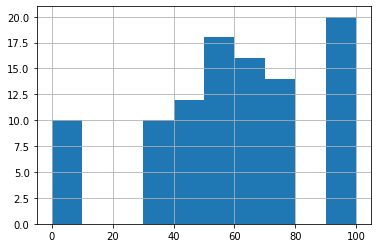

In [ ]:
notas_df["sala1"].hist()

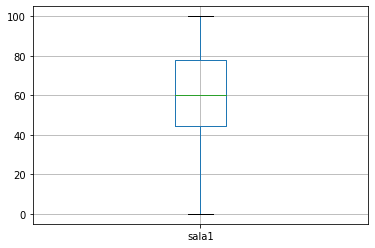

In [ ]:
notas_df.boxplot(column=["sala1"])

### Sala 2

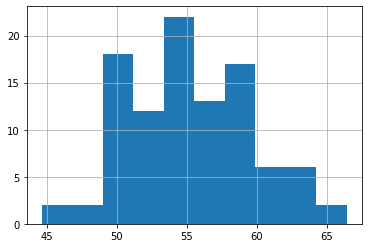

In [ ]:
notas_df["sala2"].hist()

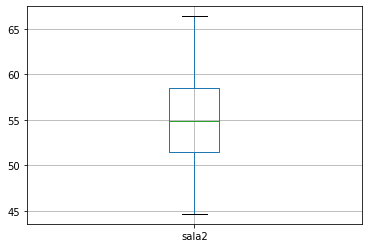

In [ ]:
notas_df.boxplot(column=["sala2"])

### Conclusão

Observa-se pelos histograma que os valores das notas da sala 2 se concentram ao redor da média. Por outro lado, o histograma da sala 1 mostra que há um pico de notas a direita do centro. Devido a sensibilidade da média, este pico de valores altos acaba deslocando o valor da média para direita e, consequentemente, enviesando seu valor. Logo, conclusão apresentada está errada pois, a sala 2 possui menor desvio em relação a média (valores mais centrados), tornando suas notas mais consistentes e, consequentemente, tendo um desempenho melhor que a sala 1 (explicação na aula 4_espalhamento, 8m30s)


### Questão 02.
Calcule o número de aprovados em cada uma das salas.

In [ ]:
def num_alunos_aprovados(notas, media=50):

  aprovados1 = (notas["sala1"] > media).sum()
  aprovados2 = (notas["sala2"] > media).sum()

  print(f"A sala 1 teve {aprovados1} alunos aprovados.")
  print(f"A sala 2 teve {aprovados2} alunos aprovados.")

In [ ]:
num_alunos_aprovados(notas_df, media=50)

A sala 1 teve 68 alunos aprovados.
A sala 2 teve 90 alunos aprovados.


### Base Futebol

Suponha que uma emissora de televisão te contratou para analisar o perfil dos jogadores do futebol europeu para que os narradores possam dizer estatísticas sobre eles durante os jogos.

Os dados estão numa planilha chamada `players_sampled.csv`, onde cada linha contém os dados de um jogador e cada coluna possui um atributo. Essa base foi adaptada do site de competições de ciência de dados chamado [Kaggle](*https*://www.kaggle.com/hugomathien/soccer).

In [ ]:
# Carregando a base
df = pd.read_csv(PATH + 'players_sampled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB


In [ ]:
df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159


### Questão 03
Para cada atributo da base, identifique quais são categoricos/nominais, ordinais, intervalares e racionais. (Não precisa ser em código)



Atributos

*   id: **nominal**
*   player_api_id: **nominal**
*   player_name: **nominal**
*   player_fifa_api_id: **nominal**
*   birthday: **intervalar**
*   height: **racional**
*   weight: **racional**




### Questão 4

Formule 3 hipóteses sobre a base ou seus atributos que possam ser verificadas com os conceitos apresentados na disciplina.

Ex: O atributo altura tem mais valores abaixo da média (obliquidade negativa)


-   Hipótese 1: Há mais jogadores com alturas acima da média (obliquidade negativa).

-   Hipótese 2: Há mais jogadores com peso acima da média (obliquidade negativa)

-   Hipótese 3: As alturas dos jogadores apresentam uma distribuição mais achatada que a distribuição normal (curtose negativa).




### Questão 5

Verifique se suas hipóteses são verdadeiras

### Hipótese 1

Analisando os valores de média, moda, mediana e obliquidade chegamos a conclusão que a hipótese é verdadeira, pois os valores de moda e mediana estão a direita do valor da média e sua obliquidade é negativa.

In [ ]:
def h1(df):

  sample_values = df["height"].values

  df["height"].hist()
  print(f"- O valor da sua média é {sample_values.mean()}")
  print(f"- O valor da sua moda é {stats.mode(sample_values)}")
  print(f"- O valor da sua mediana é {np.median(sample_values)}")
  print(f"- O valor da sua obliquidade é {stats.skew(sample_values)}")

- O valor da sua média é 182.0164
- O valor da sua moda é ModeResult(mode=array([182.88]), count=array([69]))
- O valor da sua mediana é 182.88
- O valor da sua obliquidade é -0.1195645747184587


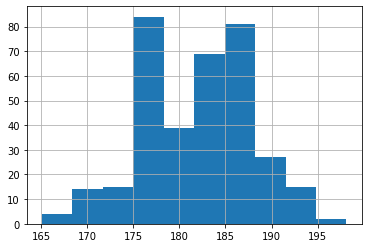

In [ ]:
h1(df)

### Hipotese 2

Analisando os valores de média, moda, mediana e obliquidade conclui-se que a hipótese é falsa. O que ocorre é o contrário, predominam jogadores com peso abaixo da média, já que os valores de moda e mediana são menores que o valor da média e sua obliquidade é positiva.

In [ ]:
def h2(df):

  sample_values = df["weight"].values

  df["weight"].hist()
  print(f"- O valor da sua média é {sample_values.mean()}")
  print(f"- O valor da sua moda é {stats.mode(sample_values)}")
  print(f"- O valor da sua mediana é {np.median(sample_values)}")
  print(f"- O valor da sua obliquidade é {stats.skew(sample_values)}")

- O valor da sua média é 168.55428571428573
- O valor da sua moda é ModeResult(mode=array([176]), count=array([29]))
- O valor da sua mediana é 168.0
- O valor da sua obliquidade é 0.030147052872861315


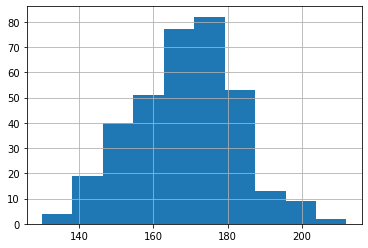

In [ ]:
h2(df)

## Hipótese 3

Observa-se pela análise do histograma dos valores de altura e do valor da kurtose que a hipótese é verdadeira. Observa-se que o valor da kurtose é negativo o que justifica a aparência achatada da distribuição.

In [ ]:
def h3(df):

  sample_values = df["height"].values

  df["height"].hist()
  print(f"- O valor da kurtose é {stats.kurtosis(sample_values)}")

- O valor da kurtose é -0.44312347846415756


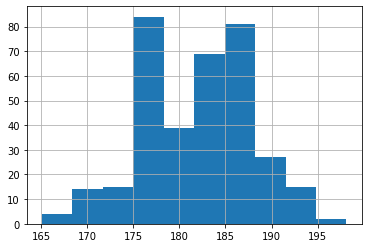

In [ ]:
h3(df)

### Questão 6
- Os pesos dos jogadores foram dados em libras. Transforme os pesos dos jogadores para quilos e substitua o valor antigo da coluna no DataFrame. Dica: 1 lb = 0.45359237 kg

- Crie um novo atributo chamado "age" (idade) a partir da data de nascimento do jogador. Este atributo deve ser considerado nas próximas questões. A idade deve ser um número inteiro.

In [ ]:
def lb_para_kg(df):

   df["weight_kg"] = 0.45359237 * df["weight"]

   return df

In [ ]:
# A biblioteca calendar ou a datetime podem te ajudar
from datetime import datetime

def dias_para_anos(dias):

  return int(dias/365)

def calc_idade(df):

  time_deltas = datetime.now() - pd.to_datetime(df["birthday"])
  df["age"] = [dias_para_anos(delta.days) for delta in time_deltas]

  return df

In [ ]:
df = lb_para_kg(df)
df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,weight_kg
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176,79.832257
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150,68.038855
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179,81.193034
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,69.853225
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159,72.121187


In [ ]:
df = calc_idade(df)
df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,weight_kg,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150,68.038855,28
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179,81.193034,34
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159,72.121187,35


### Questão 7
Implemente a função que calcule o percetil de determinado atributo. (Atenção: As bibliotecas Numpy/Pandas possuem a função *quantile* você não deve usá-la em sua função). Os resultados também podem variar dependendo da implementação. Tente seguir a definição dos slides.

In [ ]:
def percentile(df, nome_attr, pct):
  '''
  Parameters
  - df: Dataframe com a base
  - attr_name: Nome do atributo que queremos utilizar para computar o percentil
  - pct: Percentil. Um número entre 0 e 1.
  '''

  sorted_values = np.sort(df[nome_attr].values) # retorna uma copia ordenada do array, nao modifica o original
  p = int(np.ceil(pct * len(sorted_values) + 0.5)) # certificar que retorna um inteiro para indexação

  return sorted_values[p]

In [ ]:
percentile(df, "height", 0.2)

177.8

### Questão 08
Utilizando sua função, calcule a mediana, 1º quartil, 3º quartil do atributo altura.

In [ ]:
# primeiro quartil
percentile(df, "height", 0.25)

177.8

In [ ]:
# segundo quartil (mediana)
percentile(df, "height", 0.5)

182.88

In [ ]:
# terceiro quartil
percentile(df, "height", 0.75)

185.42

In [ ]:
# validando
df["height"].describe()

count    350.000000
mean     182.016400
std        6.056907
min      165.100000
25%      177.800000
50%      182.880000
75%      185.420000
max      198.120000
Name: height, dtype: float64

# Questão 09

Calcule os quatro momentos (média, variância, obliquidade e achatamento) dos atributos onde essas métricas fazem sentido.

  - Dica: Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy.stats** para obliquidade (skew) e achatamento (kurtosis).

In [ ]:
def quatro_momentos(df, nome_attr):

  sample_array = df[nome_attr].values

  print(f"- Primeiro momento (média): {sample_array.mean()}")
  print(f"- Segundo momento (variância): {sample_array.var()}")
  print(f"- Terceiro momento (obliquidade): {stats.skew(sample_array)}")
  print(f"- Quarto momento (curtose): {stats.kurtosis(sample_array)}")


- Primeiro momento (média): 182.0164
- Segundo momento (variância): 36.58130932571427
- Terceiro momento (obliquidade): -0.1195645747184587
- Quarto momento (curtose): -0.44312347846415756


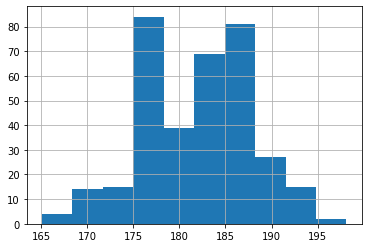

In [ ]:
analyse = "height"
df[analyse].hist()
quatro_momentos(df, analyse)

### Questão 10

- Calcule o histograma e o boxplot dos atributos altura, peso e idade.
- A distribuição dos atributos possui curvatura para algum lado ou são centrados?
- A partir do Boxplot, verifique se os atributos tem outliers e justifique.

In [ ]:
def hist(df, nome_attr):

  df[nome_attr].hist()

def boxplot(df, nome_attr):

  df.boxplot(column=nome_attr)

### Histogramas

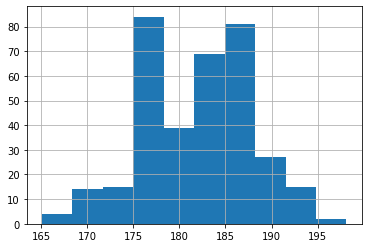

In [ ]:
hist(df, "height")

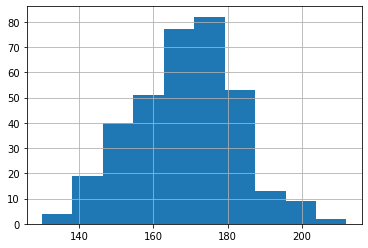

In [ ]:
hist(df, "weight")

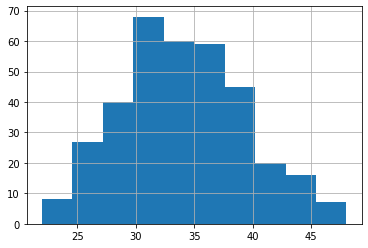

In [ ]:
hist(df, "age")

### Boxplots

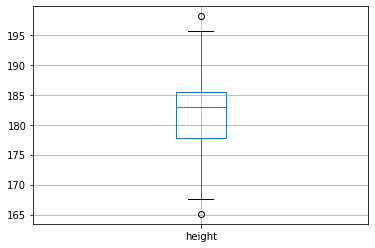

In [ ]:
boxplot(df, "height")

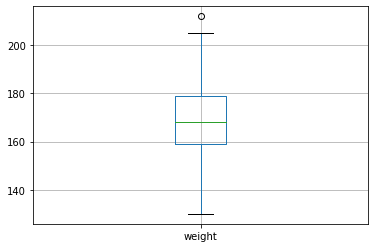

In [ ]:
boxplot(df, "weight")

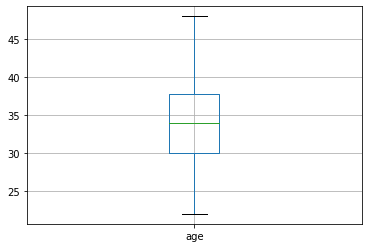

In [ ]:
boxplot(df, "age")

In [ ]:
quatro_momentos(df, "age")

- Primeiro momento (média): 34.02571428571429
- Segundo momento (variância): 26.859338775510203
- Terceiro momento (obliquidade): 0.2593120504662387
- Quarto momento (curtose): -0.3720064962268257


### Discussão

- A distribuição dos atributos possui curvatura para algum lado ou são centrados?

Analisando os histogramas para cada um dos atributos analisados, observamos que no geral os histogramas mantém o formato de "sino" de uma distribuição normal, porém apresentam leves desvios em relação ao eixo central. Este fato indica a presença de valores de obliquidade cujo módulo é diferente de zero. A altura possui obliquidade negativa (deslocamento para direita) e tanto o peso quanto a altura possuem obliquidades positivas (deslocamento para esquerda).

- A partir do Boxplot, verifique se os atributos tem outliers e justifique.

Os plots de boxplot do Pandas identificam outliers como sendo pontos fora da extensão dos boxplots. Os outliers correspondem a valores que são maiores que a cerca superior (Q3 + 1.5 x IQR) e inferiores a cerca inferior (Q1 - 1.5 x IQR). Sendo assim, há dois outliers nas medidas de altura (um acima da cerca superior e outro abaixo da cerca inferior), um outlier nas medidas de peso (acima da cerca superior) e não há outliers nas medidas de idade.


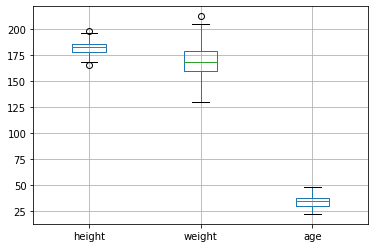

In [ ]:
# Da para fazer de uma vez...
df.boxplot(column=["height", "weight", "age"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53a8ddc890>,
      dtype=object)

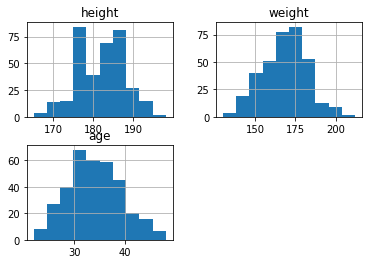

In [ ]:
df.hist(column=["height", "weight", "age"])